# Research Question 2
## How does a nearby golf course correlate with lot size and other features?
This questions couldn't be answered with the data provided, so I gathered the addresses of 50 golf courses in King County, fetched their coordinates (notebook EDA_3-2), and found the nearest golf course for every house (notebook EDA_3-3).

In [9]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from string import ascii_letters
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Loading cleaned housing data Panda DataFrame
df = pd.read_csv("data/King_County_House_prices_dataset_cleaned_distance.csv")

First, I had a general look on the distance:

In [11]:
# Descriptive statistics of the distance
df.nearest_golf_distance.describe()

count    21597.000000
mean         3.004434
std          2.172133
min          0.028566
25%          1.732225
50%          2.663198
75%          3.730949
max         42.657551
Name: nearest_golf_distance, dtype: float64

Over 75% of houses in King County are within 4 km of a golf course, but my stakeholder wants a house near one. There are some houses really far away, so I removed them as outliers:



In [12]:
# Removes all rows, where the z-score of nearest_golf_distance is > 3
df = df[(np.abs(stats.zscore(df.nearest_golf_distance)) < 3)]

<AxesSubplot:xlabel='nearest_golf_distance', ylabel='Count'>

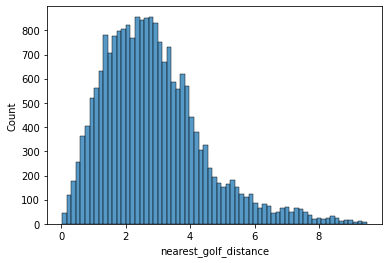

In [13]:
# Histogram of distance to golf course
sns.histplot(data=df, x="nearest_golf_distance")

Next, I looked at the correlation of distance with some other features:

<AxesSubplot:>

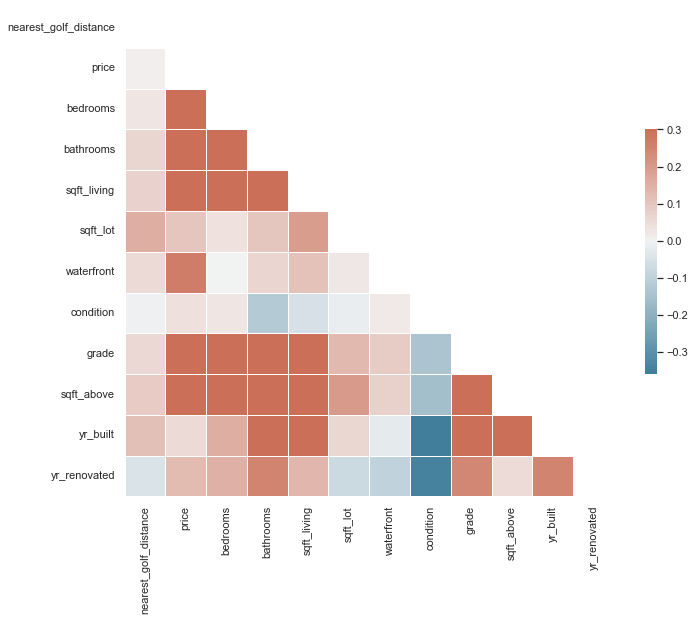

In [14]:
# Creating a new DataFrame with relevant data
df_q2 = df.filter(['nearest_golf_distance','price', 'bedrooms',	'bathrooms', 'sqft_living',	'sqft_lot', 'waterfront', 'condition', 'grade',	'sqft_above', 'yr_built','yr_renovated'])

# Plotting a correlation matrix 
sns.set_theme(style="white")

# Compute the correlation matrix
corr_q2 = df_q2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_q2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_q2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

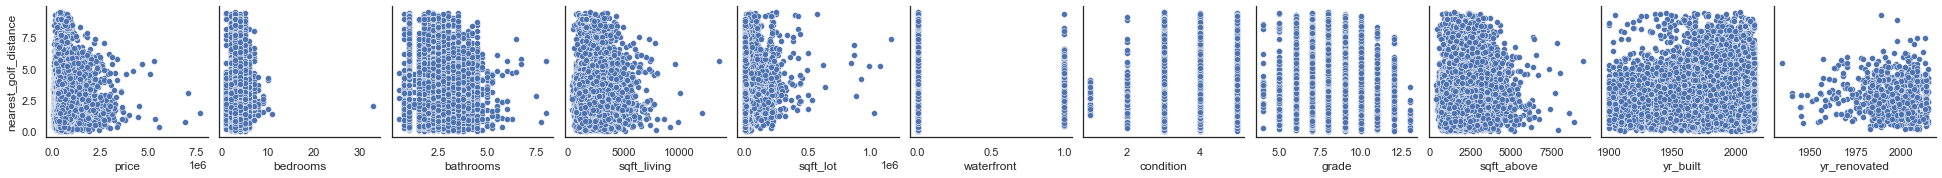

In [15]:
# Creating correlation plots
sns.pairplot(
    df,
    x_vars=['price', 'bedrooms',	'bathrooms', 'sqft_living',	'sqft_lot', 'waterfront', 'condition', 'grade',	'sqft_above', 'yr_built','yr_renovated'],
    y_vars=["nearest_golf_distance"],
)

There seems to be a small positive correlation with a few features. Houses with higher price, size etc. seem to be relatively closer to golf courses. Especially highest grade houses seem to be close to golf courses. Also, very old houses and houses with very bad condition are located mostly within 5 km of a golf course. Newer houses are also further away. This may mean that there are more golf courses in areas with older buildings. Good for my stakeholder!

#### Conclusion

The research question and hypothesis were:

How does a nearby golf course correlate with lot size and other features?
- If a golf course is close to the property, lot size and also other features are higher compared to properties further away.

This hypothesis seems to be true for price, grade, bedrooms, bathrooms, and house size. However, it does"t seem to be true for house condition, as all bad condition houses are within 5 km of a golf course.

__Takeaway: There is a good chance that there is a suitable house for my stakeholder close to a golf course.__